In [102]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [103]:
df = pd.read_csv('Medicalpremium.csv')
pd.set_option('display.max_columns', None)

link dataset
https://www.kaggle.com/datasets/tejashvi14/medical-insurance-premium-prediction

In [104]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [106]:
df.isna().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

<Axes: >

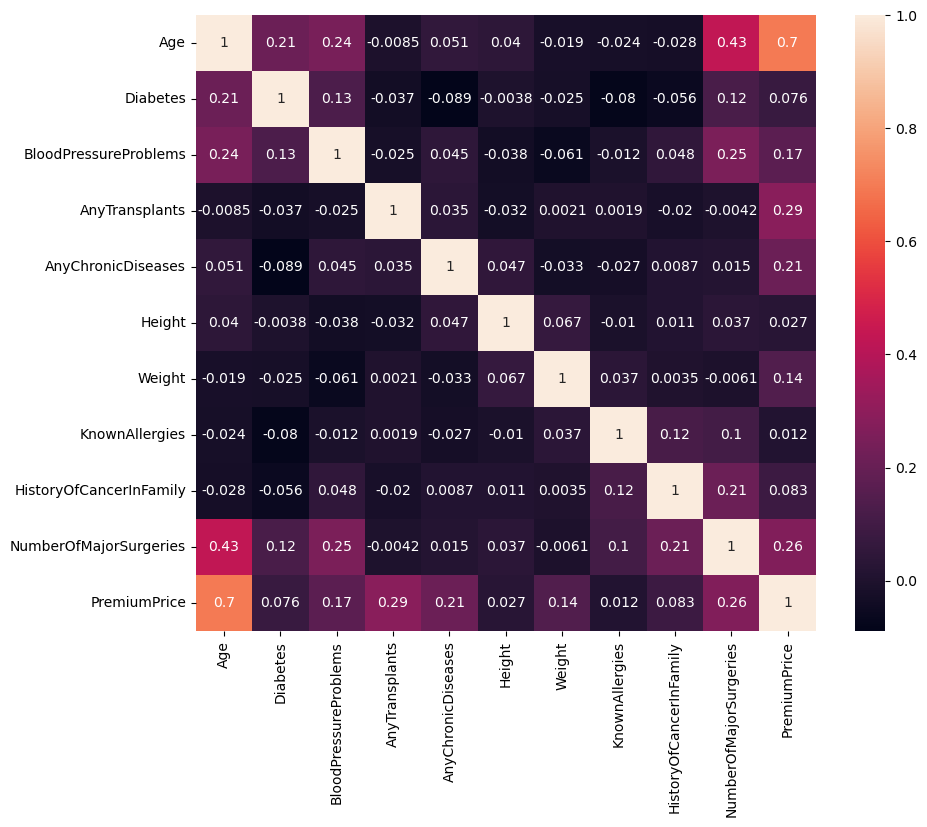

In [107]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

C:\Users\bmkus\AppData\Local\Temp\ipykernel_1052\294776621.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PremiumPrice'])


<Axes: xlabel='PremiumPrice', ylabel='Density'>

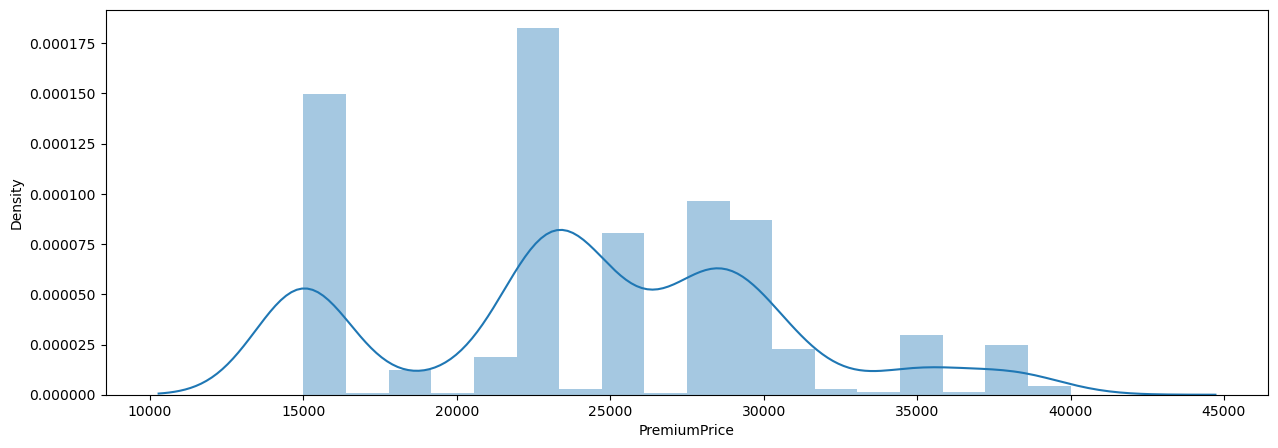

In [108]:
plt.figure(figsize=(15,5))
sns.distplot(df['PremiumPrice'])

In [109]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [140]:
features = ['Age','Diabetes','BloodPressureProblems','AnyTransplants','AnyChronicDiseases','Height','Weight','KnownAllergies','HistoryOfCancerInFamily','NumberOfMajorSurgeries']
x = df[features]
y = df['PremiumPrice']
x.shape, y.shape

((986, 10), (986,))

In [173]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=34,test_size=0.1)
y_test.shape
x_train.shape

(887, 10)

In [174]:
x_test.shape

(99, 10)

In [175]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [176]:
score = lr.score(x_test,y_test)
print('Akurasi model Regresi Linear', score)

Akurasi model Regresi Linear 0.7267247299878619


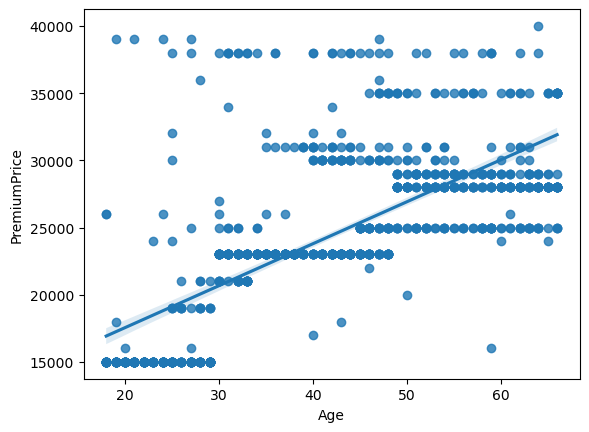

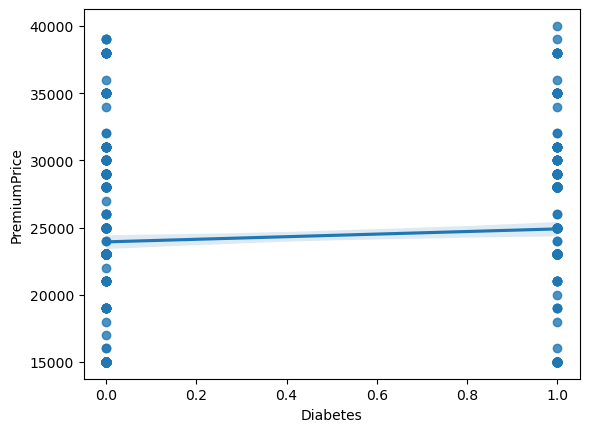

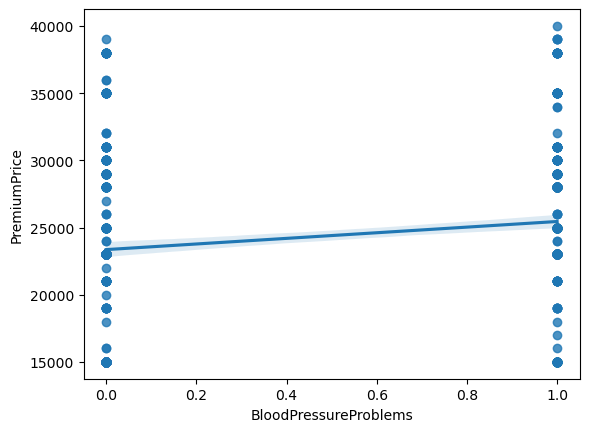

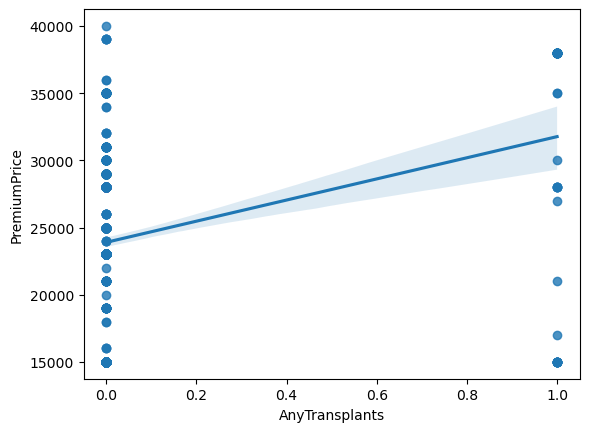

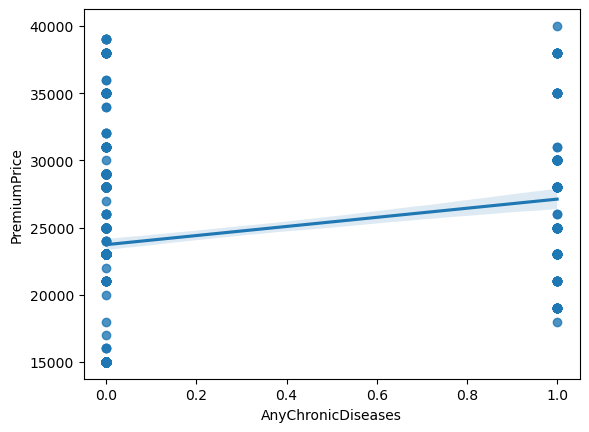

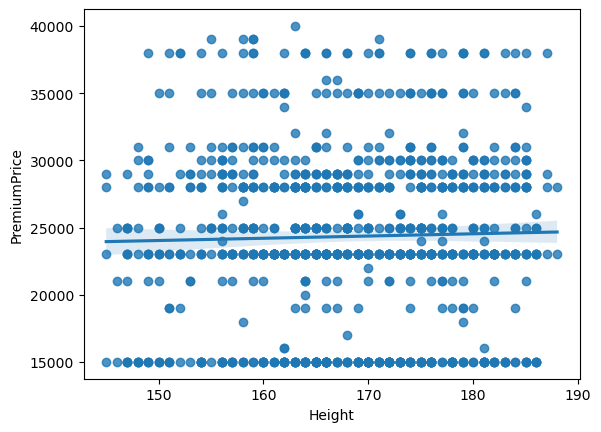

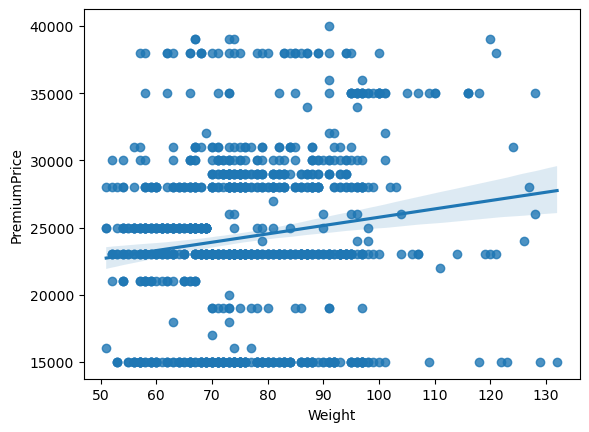

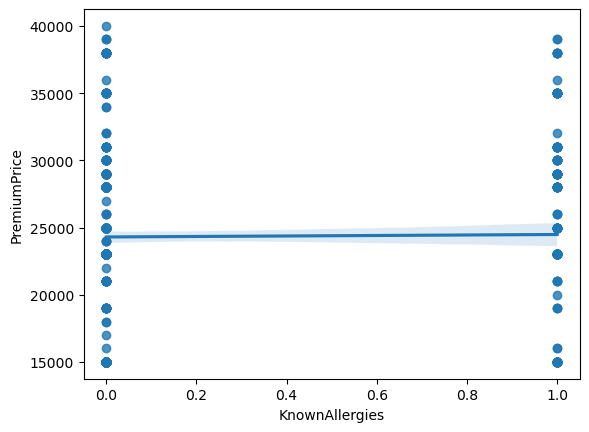

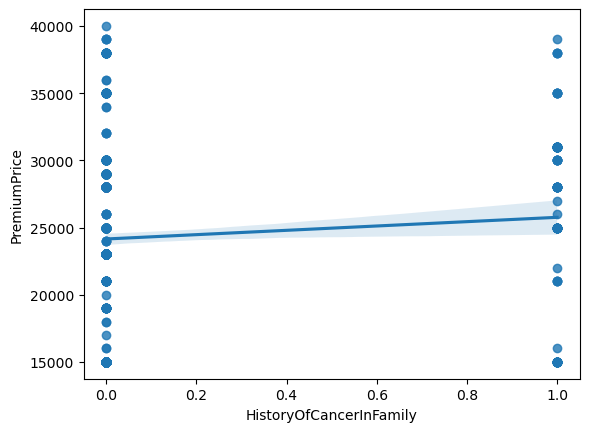

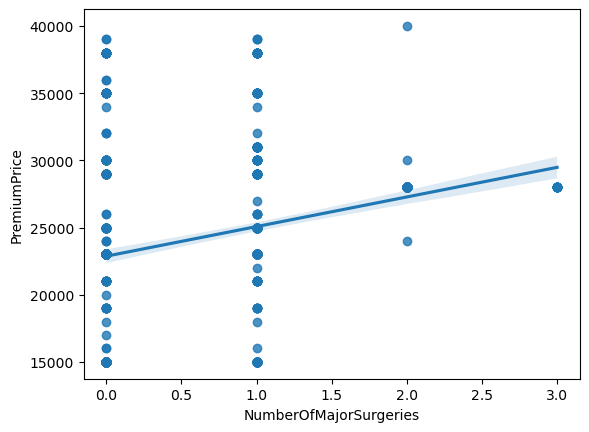

In [115]:
for features in df:
    if features in ['PremiumPrice']:
        continue
    
    sns.regplot(y=df['PremiumPrice'],x=df[features])
    plt.show()

['Age', 'PremiumLabel_Basic', 'PremiumLabel_Average', 'PremiumLabel_Low',
       'NumberOfMajorSurgeries', 'AgeLabel_Low', 'PremiumLabel_High', 'Weight',
       'AgeLabel_High', 'AgeLabel_Basic', 'AnyChronicDiseases',
       'AgeLabel_SuperHigh', 'PremiumLabel_SuperHigh', 'AgeLabel_Average',
       'AnyTransplants'],

In [116]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [177]:

input_data = np.array([[45,0,0,0,0,155,57,0,0,0]])

prediction = lr.predict(input_data)
print('Estimasi Harga Asuransi tersebut adalh :',prediction)
print('Harga Asli Asuransi tersebut adalh : 25000')

Estimasi Harga Asuransi tersebut adalh : [23350.49539725]
Harga Asli Asuransi tersebut adalh : 25000


c:\Users\bmkus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [178]:
from sklearn.metrics import r2_score

r2_score(y_test, pred)

0.7267247299878619

In [179]:
import pickle

filename = 'estimasi_harga_asuransi.sav'
pickle.dump(lr,open(filename,'wb'))